# Bank Customer Churn Prediction Project

# Overview

This project aims on predicting whether customers of a bank will leave based on various attributes. Customer churn is a significant concern in the banking sector, as keeping current customers is usually more cost-efficient than attracting new ones.

# Objectives

Data Preprocessing: Clean and prepare the dataset for modeling.

Exploratory Data Analysis: Understand the data distribution and relationships between features.

Feature Engineering: Create new features that may help improve model performance.

Model Building: Train and evaluate different machine learning models to predict customer churn.

Model Evaluation: Assess the performance of the models using appropriate metrics and visualization techniques.


# Data Description

The following are the variable definition:

CustomerId: Unique identifier for each customer.

Surname: Customer's last name.

CreditScore: Customer's credit score.

Geography: Country of the customer.

Gender: Gender of the customer.

Age: Age of the customer.

Tenure: Number of years the customer has been with the bank.

Balance: Account balance of the customer.

NumOfProducts: Number of products the customer has with the bank.

HasCrCard: Whether the customer has a credit card (1: Yes, 0: No).

IsActiveMember: Whether the customer is an active member (1: Yes, 0: No).

EstimatedSalary: Estimated salary of the customer.

Exited: Whether the customer has churned (1: Yes, 0: No).

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox,zscore

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


# Load the Dataset and Check the first few rows

In [3]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Check the shape of the dataset
df.shape

(10000, 14)

The shape shows that the dataset has 10000 rows and 14 columns

In [7]:
#Check for columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
#Check for more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The output shows that there are no more missing values in the dataset

In [9]:
# Check for descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
df.describe(include = "object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [18]:
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [19]:
cat_cols = df.select_dtypes(include ="object").columns
cat_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [13]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
df.apply(lambda x: len(x.unique()))

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Exploratory Data Analysis

First Check the distribution of the target variable

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

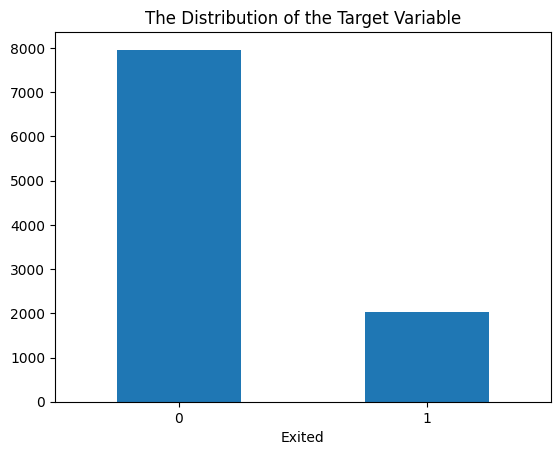

In [23]:
df["Exited"].value_counts().plot(kind = "bar")
plt.title('The Distribution of the Target Variable')
plt.xticks(rotation = 0)

The plot shows that the number of not-exited is higher than the number of the exited seemingly showing imbalance which can affect the model performance.

# Balance the Target Variable

In [34]:
# Filter the DataFrame
not_Exited = df[df["Exited"] == 0]
Exited = df[df["Exited"] == 1]

# Print the shapes of the DataFrame slices
print('not_Exited.shape[0]:', not_Exited.shape[0])
print('Exited.shape[0]:', Exited.shape[0])


not_Exited.shape[0]: 7963
Exited.shape[0]: 2037


In [36]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)

df1 = pd.concat([not_Exited , Exited])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

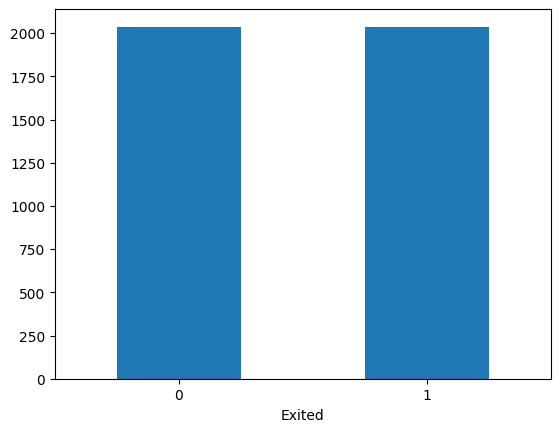

In [38]:
df1["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

<Axes: xlabel='Gender'>

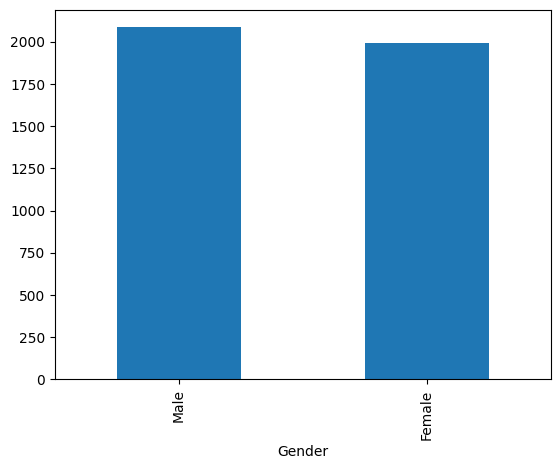

In [39]:
df1["Gender"].value_counts().plot(kind = "bar")

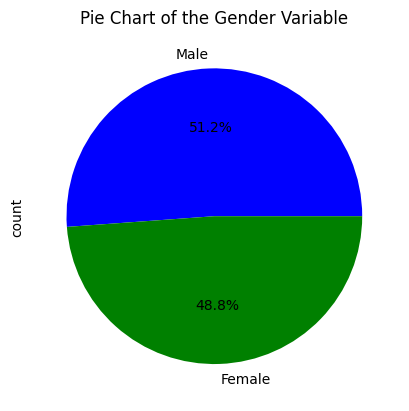

In [41]:
df1['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Pie Chart of the Gender Variable')
plt.show()

The distribution of the Males is 51.2% while the distribution of females is 48.8%

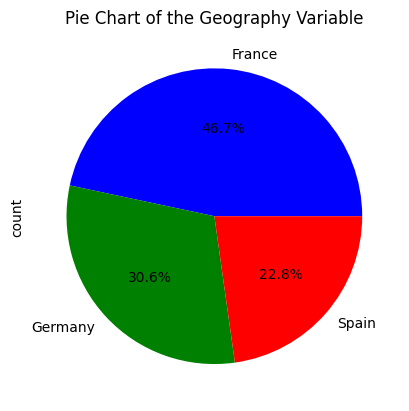

In [43]:
df1['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Pie Chart of the Geography Variable')
plt.show()

The chart shows that the distribution count of Geography variable as follows:
- France 46.7%
- Germany 30.6%
- Spain 22.8%

Text(0.5, 1.0, 'A plot Showing the Distribution of NumOfProducts Variable')

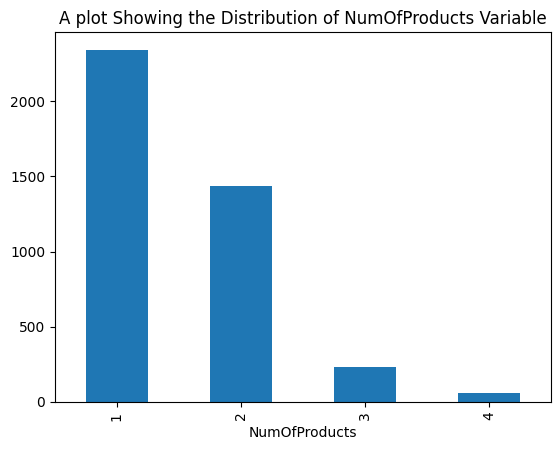

In [46]:
df1["NumOfProducts"].value_counts().plot(kind = "bar")
plt.title('A plot Showing the Distribution of NumOfProducts Variable')

Text(0.5, 1.0, 'A plot Showing the Distribution of HasCrCard Variable')

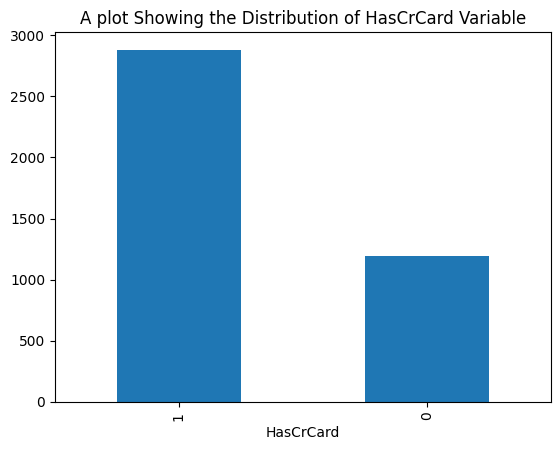

In [47]:
df1["HasCrCard"].value_counts().plot(kind = "bar")
plt.title('A plot Showing the Distribution of HasCrCard Variable')

Text(0.5, 1.0, 'A plot Showing the Distribution of Tenure')

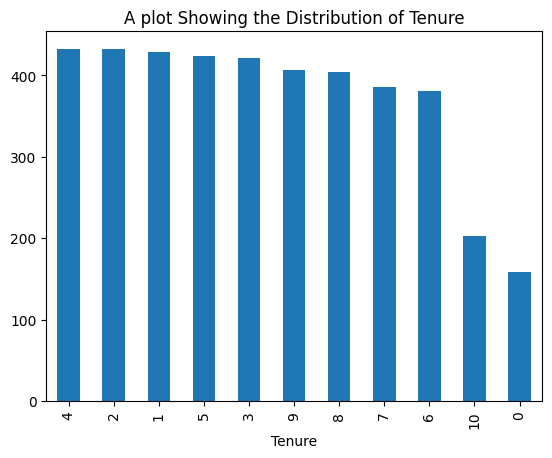

In [52]:
df1["Tenure"].value_counts().plot(kind = "bar")
plt.title('A plot Showing the Distribution of Tenure')

Text(0.5, 1.0, 'A plot Showing the Distribution of IsActiveMember')

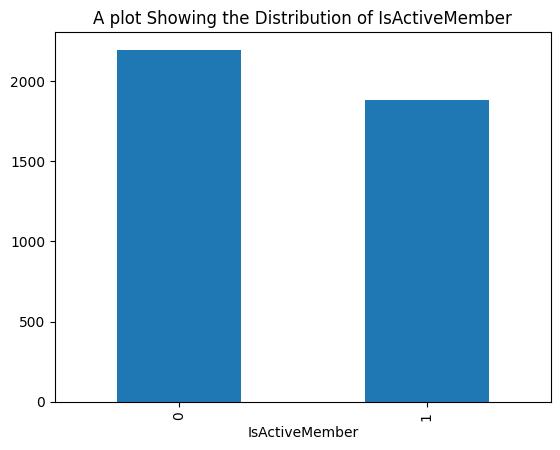

In [51]:
df1["IsActiveMember"].value_counts().plot(kind = "bar")
plt.title('A plot Showing the Distribution of IsActiveMember')

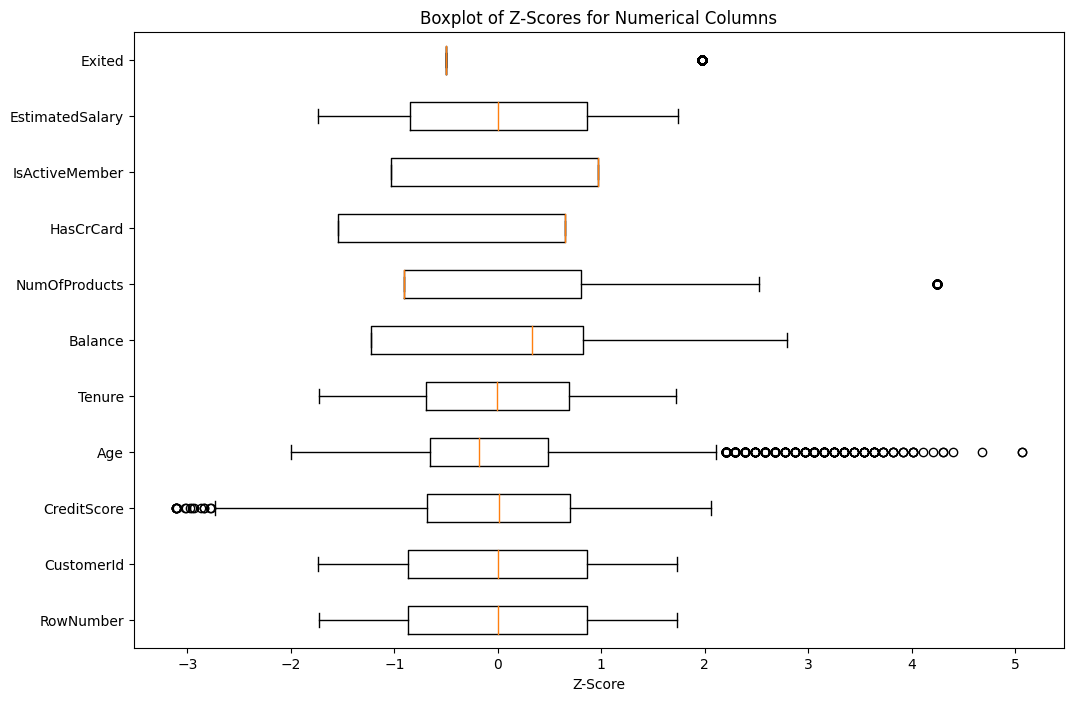

In [55]:
# outlier detection
z_scores = zscore(df[num_cols])

z_scores_df = pd.DataFrame(z_scores, columns=num_cols)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_df.values, labels=num_cols, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

For the Age it is possible for people to live up to 92 so in this instance we are not going to treat 92 as an outlier


# Label Encode
- For converting categorical data into numerical values. In our case the Gender and Surname columns

In [61]:
le = LabelEncoder()
# Apply LabelEncoder to the 'gender' column
df1['Gender'] = le.fit_transform(df1['Gender'])

# Apply LabelEncoder to the 'surname' column
df1['Surname'] = le.fit_transform(df1['Surname'])

# One Hot Encode

In [66]:
df2 = pd.get_dummies(df1, columns=['Geography']).astype(int)
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8966,8967,15679963,1091,737,1,43,8,96353,1,0,0,10209,0,0,1,0
492,493,15624170,1526,639,0,38,4,81550,2,0,1,118974,0,1,0,0
1599,1600,15719309,1493,670,0,42,1,115961,2,0,1,29483,0,1,0,0
4185,4186,15642570,1433,675,1,35,8,0,2,1,0,29062,0,0,0,1
1259,1260,15701265,1566,559,0,36,1,104356,2,0,1,54184,0,0,1,0


# Seperating dependents and independent variables

In [67]:
X = df2.drop(['Exited','CustomerId'], axis = 1)
y = df2.pop('Exited') 

In [72]:
X.head()

,RowNumber,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
8966,8967,1091,737,1,43,8,96353,1,0,0,10209,0,1,0
492,493,1526,639,0,38,4,81550,2,0,1,118974,1,0,0
1599,1600,1493,670,0,42,1,115961,2,0,1,29483,1,0,0
4185,4186,1433,675,1,35,8,0,2,1,0,29062,0,0,1
1259,1260,1566,559,0,36,1,104356,2,0,1,54184,0,1,0


In [71]:
y.head()

8966    0
492     0
1599    0
4185    0
1259    0
Name: Exited, dtype: int64

# Feature Scaling

In [73]:
#Scaling the dataset
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
scaled_data.head()

,RowNumber,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,1.385661,0.390921,0.903917,0.977187,0.171428,1.045749,0.232631,-0.760262,-1.554001,-0.925679,-1.576454,-0.935322,1.507411,-0.543119
1,-1.539327,1.258397,-0.099706,-1.023346,-0.297673,-0.339516,-0.009562,0.724545,-1.554001,1.080288,0.309823,1.069150,-0.663389,-0.543119
2,-1.157221,1.192589,0.217767,-1.023346,0.077608,-1.378464,0.553438,0.724545,-1.554001,1.080288,-1.242191,1.069150,-0.663389,-0.543119
3,-0.264606,1.072937,0.268972,0.977187,-0.579134,1.045749,-1.343806,0.724545,0.643500,-0.925679,-1.249493,-0.935322,-0.663389,1.841219
4,-1.274580,1.338165,-0.918990,-1.023346,-0.485314,-1.378464,0.363568,0.724545,-1.554001,1.080288,-0.813810,-0.935322,1.507411,-0.543119


# Model Training

In [75]:
# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3259, 14), (3259,), (815, 14), (815,))

In [77]:
y_train.shape

(3259,)

In [107]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=18),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost':CatBoostClassifier(loss_function='Logloss', iterations=100, verbose=0,random_state =42),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [108]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Model Evaluation

In [109]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results = pd.DataFrame(results).T
results

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.700613,0.660804,0.706989,0.683117
Decision Tree,0.684663,0.645570,0.685484,0.664928
Random Forest,0.752147,0.736111,0.712366,0.724044
Gradient Boosting,0.776687,0.763889,0.739247,0.751366
XGBoost,0.752147,0.730978,0.723118,0.727027
CatBoost,0.774233,0.755435,0.747312,0.751351
SVC,0.746012,0.718833,0.728495,0.723632
KNN,0.685890,0.656757,0.653226,0.654987
Naive Bayes,0.696933,0.676056,0.645161,0.660248


# Training GradientBoosting Classifier

In [123]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [124]:
# Print confusion matrix and classification report
y_pred = Gradient_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[358  85]
 [ 97 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       443
           1       0.76      0.74      0.75       372

    accuracy                           0.78       815
   macro avg       0.78      0.77      0.77       815
weighted avg       0.78      0.78      0.78       815



# Visualize the Confusion Matrix

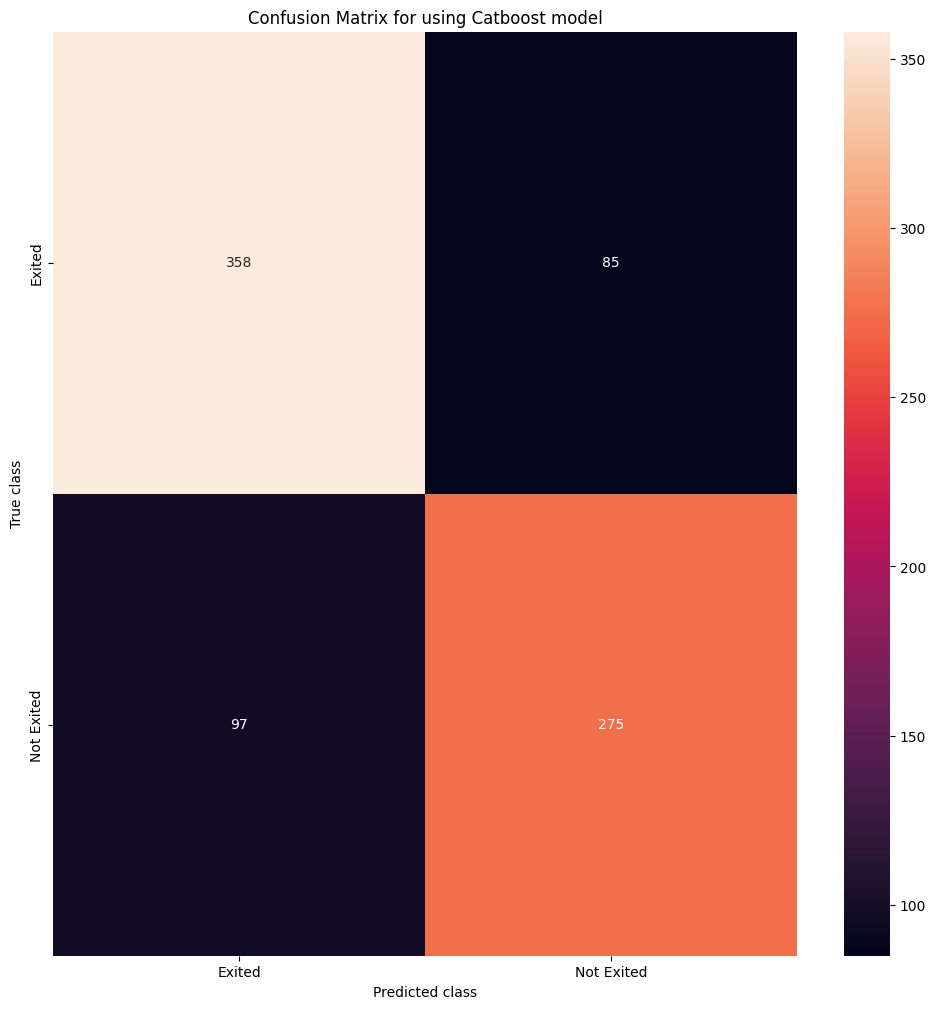

In [125]:
LABELS = ['Exited', 'Not Exited']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12 ,12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
           yticklabels = LABELS, annot =True, fmt = "d");
plt.title("Confusion Matrix for using Catboost model")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# The best performing model was GradientBoosting Classifier

In [126]:
if y_pred[1] == 1: # 0 meaning normal 1 meaning fraud
    print("Exited")
else:
    print("Not Exited")

Exited
